In [1]:
import pandas as pd
xls2 = pd.ExcelFile('Mike V data request 03022022.xlsx')
df4 = pd.read_excel(xls2, 'Sheet1')
df5 = pd.read_csv('slideroom 19-22.csv')

pd.set_option('display.max_rows', 2000)



In [2]:
df4.rename(columns = {"STRUC_EMPLID": "peoplesoft", "PERS_NETID": "netid"}, inplace = True)
df4.rename(columns = {"PERS_PREFERRED_FIRST_NAME": "First_Name", "PERS_PREFERRED_LAST_NAME": "Last_Name"}, inplace = True)
df5.rename(columns = {"First Name": "First_Name", "Last Name": "Last_Name"}, inplace = True)



# print (df4.shape[0])
# print (df5.shape[0])

df = pd.merge(df4, df5, how='left', on=['First_Name','Last_Name'])


print (df.shape[0])
df['peoplesoft'] = df['peoplesoft'].astype(str)
df.rename(columns = {"Email Address": "Slideroom_Email_Address"}, inplace = True)


df = df.drop_duplicates(subset='peoplesoft', keep="first")
#print (df.shape[1])

df.dropna(axis=1, how='all', inplace = True)
#print (df.shape[1])


df.to_csv('masterlist.csv', encoding='utf-8', index=False)


326


<AxesSubplot:xlabel='STRUC_REQ_TERM_LDESC,PERS_GENDER'>

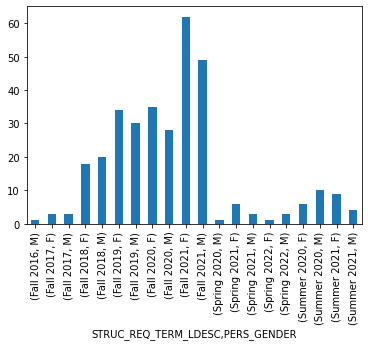

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
# sns.set(rc = {'figure.figsize':(30,12)})
# df5 = df4['PERS_IPEDS_ALL_ETHNIC_GRP_LDESC'].value_counts()
# df5 = pd.Series(df5)
# df5 = df5.to_frame()
# df5['index1'] = df5.index


#df4['PERS_GENDER'].value_counts().plot(kind = 'bar')
#sns.lineplot(data=df4['PERS_GENDER'], y='STRUC_REQ_TERM_LDESC')
#df4['PERS_GENDER'].value_counts()

#df4.groupby(['STRUC_REQ_TERM_LDESC'].count)
sex = df4.groupby(["STRUC_REQ_TERM_LDESC", "PERS_GENDER"])["STRUC_REQ_TERM_LDESC"].count().plot(kind='bar')
# sns.barplot(sex)
# sns.barplot(x='PERS_GENDER', y='STRUC_REQ_TERM_LDESC', data=sex)

sex

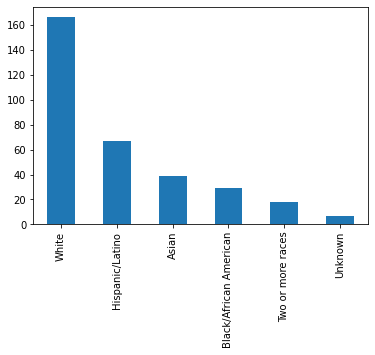

In [32]:
ax = df4['PERS_IPEDS_ALL_ETHNIC_GRP_LDESC'].value_counts().plot(kind = 'bar')
#eth = df4.groupby(["STRUC_REQ_TERM_LDESC", "PERS_IPEDS_ALL_ETHNIC_GRP_LDESC"])["STRUC_REQ_TERM_LDESC"].count().plot(kind='bar')
#eth

<AxesSubplot:>

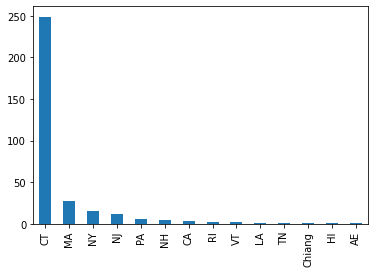

In [6]:
df4['PERS_MAIL_STATE'].value_counts().plot(kind = 'bar')


<AxesSubplot:>

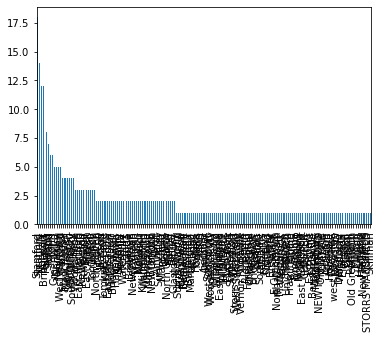

In [7]:
df4['PERS_MAIL_CITY'].value_counts()
df4['PERS_MAIL_CITY'].value_counts().plot(kind = 'bar')


<AxesSubplot:>

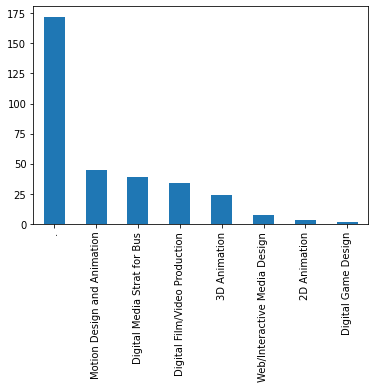

In [8]:
df4['STRUC_ACAD_SUB_PLAN_LDESC'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

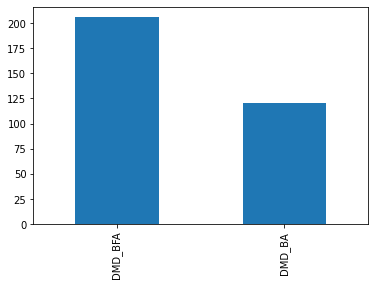

In [9]:
df4['STRUC_ACAD_PLAN'].value_counts().plot(kind = 'bar')

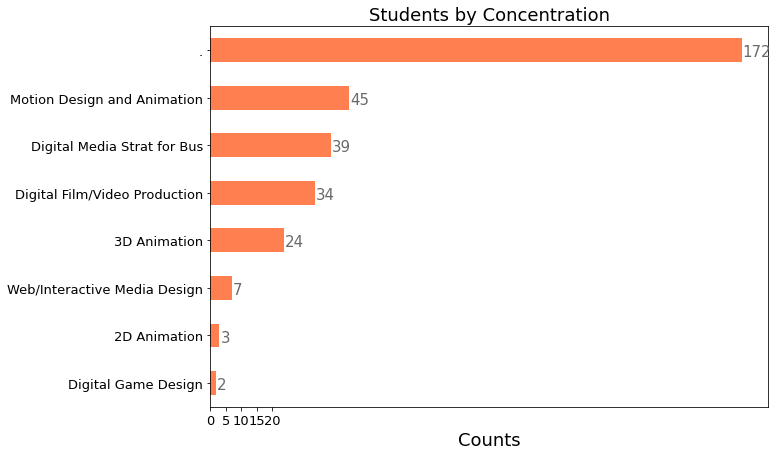

In [10]:
ax = df4['STRUC_ACAD_SUB_PLAN_LDESC'].value_counts().plot(kind='barh', figsize=(10,7),color="coral", fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Students by Concentration", fontsize=18)
ax.set_xlabel("Counts", fontsize=18)
ax.set_xticks([0, 5, 10, 15, 20])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()))), fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

<AxesSubplot:xlabel='index1', ylabel='PERS_IPEDS_ALL_ETHNIC_GRP_LDESC'>

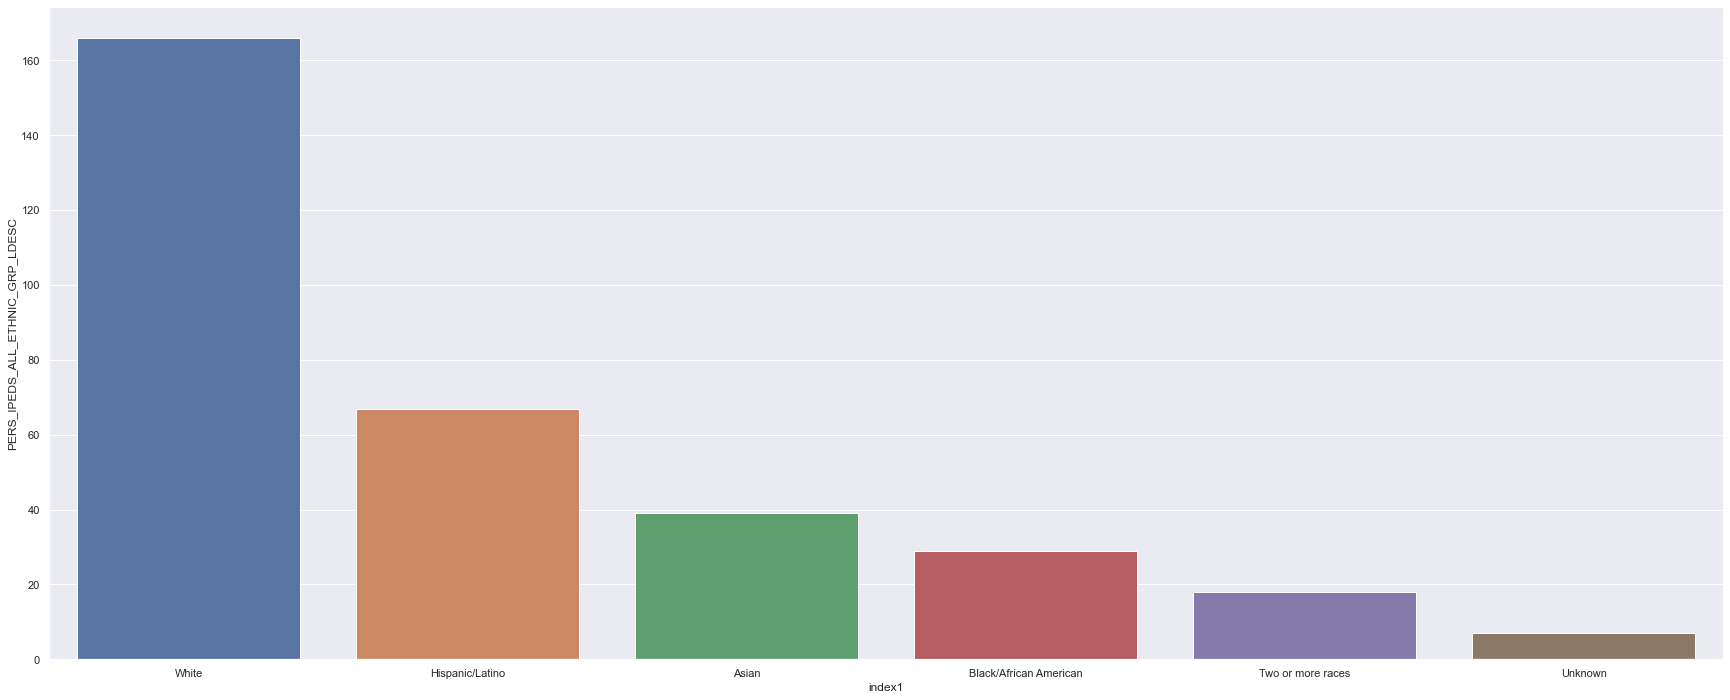

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc = {'figure.figsize':(30,12)})
df5 = df4['PERS_IPEDS_ALL_ETHNIC_GRP_LDESC'].value_counts()
df5 = pd.Series(df5)
df5 = df5.to_frame()
df5['index1'] = df5.index

sns.barplot(data = df5,x = 'index1',y = 'PERS_IPEDS_ALL_ETHNIC_GRP_LDESC')


,STRUC_REQ_TERM_LDESC,STRUC_EMPLID,PERS_CITIZENSHIP_STATUS,UC_SATTR_ATTR_VAL,CTERM_TERM_CD,Define_GRAD_AdmtTrm,Define_GRAD_AdmtTrmCd,STRUC_REQ_TERM,STFACT_UNT_TAKEN_PRGRSS,CTERM_STDNT_CAR_NBR,PERS_MAIL_ADDRESS3,PERS_MAIL_ADDRESS4,ADDR_POSTAL,STRUC_EXP_GRAD_TERM,STDAV_ADVISOR_ID,number
0,Fall 2016,2321934,1,1168,1223,0.0,0.0,1168,12,0,0.0,0.0,0.0,1223.0,2822073.0,1
1,Fall 2017,14758411,8,7068,7338,0.0,0.0,7068,71,0,0.0,0.0,13170.0,3669.0,6207337.0,6
2,Fall 2018,102124343,38,45144,46474,0.0,0.0,45144,517,0,0.0,0.0,57685.0,34244.0,53476997.0,38
3,Fall 2019,174257809,76,76512,78272,0.0,0.0,76672,892,0,0.0,0.0,184329.0,18349.0,126907855.0,64
4,Fall 2020,178289632,66,76014,77049,0.0,0.0,76104,911,0,0.0,0.0,267090.0,1223.0,104472155.0,63
5,Fall 2021,325186926,128,135058,135753,0.0,0.0,135198,1685,0,0.0,0.0,544822.0,0.0,161388721.0,111
6,Spring 2020,2814718,1,1198,1223,0.0,0.0,1203,18,0,0.0,0.0,0.0,0.0,0.0,1
7,Spring 2021,25329688,12,10842,11007,0.0,0.0,10917,138,0,0.0,0.0,37614.0,1225.0,13615856.0,9
8,Spring 2022,10043844,4,4722,4892,0.0,0.0,4892,49,0,0.0,0.0,6269.0,1223.0,7045132.0,4
9,Summer 2020,42862650,18,19123,19568,0.0,0.0,19280,219,0,0.0,0.0,6269.0,1223.0,29343706.0,16


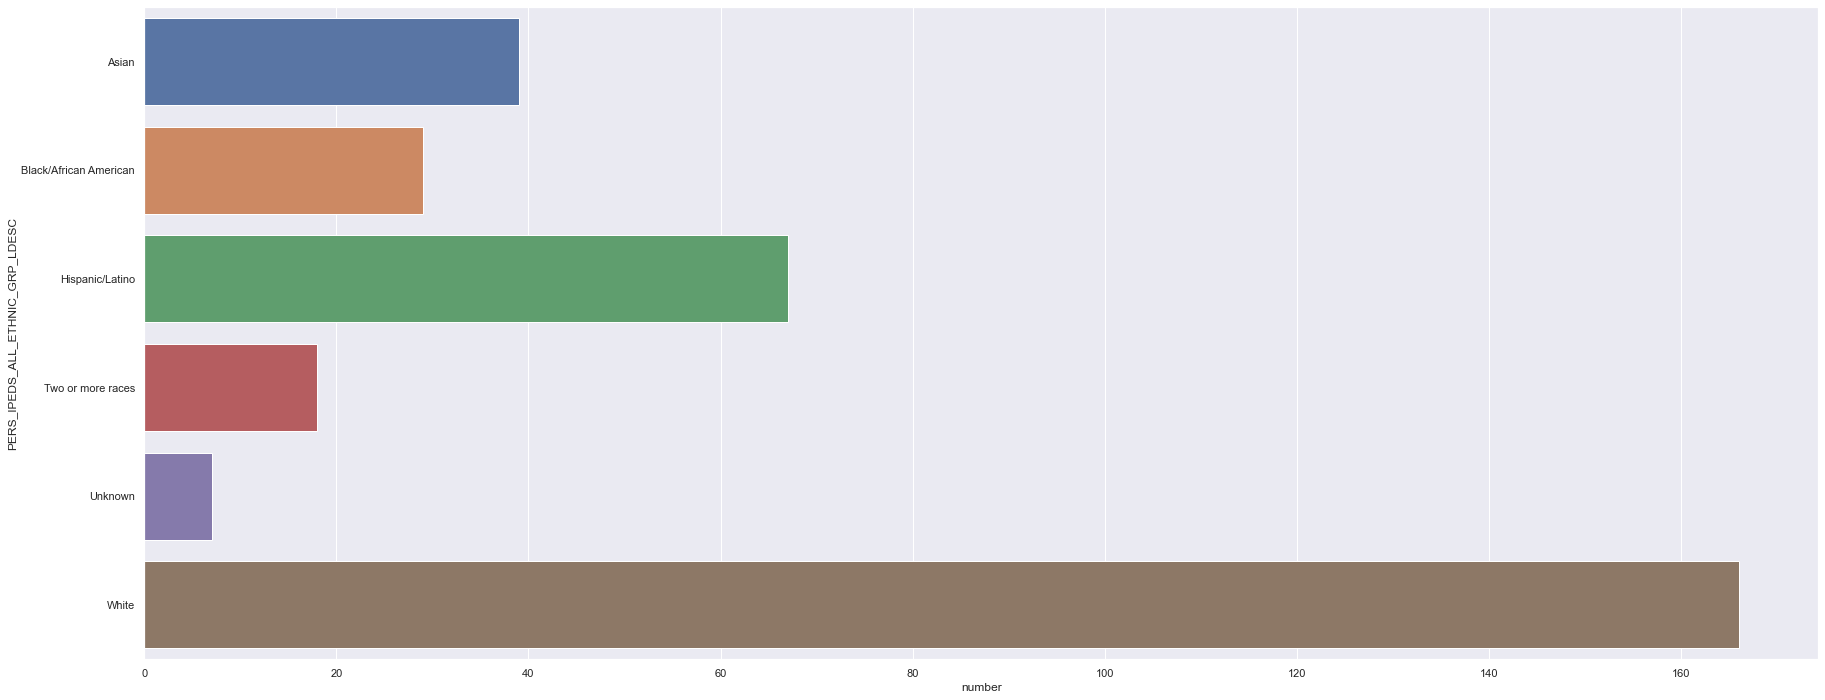

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(30,12)})
#df5 = df4['PERS_IPEDS_ALL_ETHNIC_GRP_LDESC'].value_counts()

#sns.barplot(data = df5,x = 'PERS_IPEDS_ALL_ETHNIC_GRP_LDESC',y = 'PERS_IPEDS_ALL_ETHNIC_GRP_LDESC')

df4[['PERS_IPEDS_ALL_ETHNIC_GRP_LDESC','STRUC_REQ_TERM_LDESC']]
df4['number'] = 1
import pandas as pd
import seaborn as sns
groupedvalues=df4.groupby('STRUC_REQ_TERM_LDESC').sum().reset_index()

groupedvalues2=df4.groupby('PERS_IPEDS_ALL_ETHNIC_GRP_LDESC').sum().reset_index()
g=sns.barplot(x='number',y='PERS_IPEDS_ALL_ETHNIC_GRP_LDESC',data=groupedvalues2)
groupedvalues

,STRUC_REQ_TERM_LDESC,STRUC_EMPLID,PERS_CITIZENSHIP_STATUS,UC_SATTR_ATTR_VAL,CTERM_TERM_CD,Define_GRAD_AdmtTrm,Define_GRAD_AdmtTrmCd,STRUC_REQ_TERM,STFACT_UNT_TAKEN_PRGRSS,CTERM_STDNT_CAR_NBR,PERS_MAIL_ADDRESS3,PERS_MAIL_ADDRESS4,ADDR_POSTAL,STRUC_EXP_GRAD_TERM,STDAV_ADVISOR_ID,number
0,Fall 2016,2321934,1,1168,1223,0.0,0.0,1168,12,0,0.0,0.0,0.0,1223.0,2822073.0,1
1,Fall 2017,14758411,8,7068,7338,0.0,0.0,7068,71,0,0.0,0.0,13170.0,3669.0,6207337.0,6
2,Fall 2018,102124343,38,45144,46474,0.0,0.0,45144,517,0,0.0,0.0,57685.0,34244.0,53476997.0,38
3,Fall 2019,174257809,76,76512,78272,0.0,0.0,76672,892,0,0.0,0.0,184329.0,18349.0,126907855.0,64
4,Fall 2020,178289632,66,76014,77049,0.0,0.0,76104,911,0,0.0,0.0,267090.0,1223.0,104472155.0,63
5,Fall 2021,325186926,128,135058,135753,0.0,0.0,135198,1685,0,0.0,0.0,544822.0,0.0,161388721.0,111
6,Spring 2020,2814718,1,1198,1223,0.0,0.0,1203,18,0,0.0,0.0,0.0,0.0,0.0,1
7,Spring 2021,25329688,12,10842,11007,0.0,0.0,10917,138,0,0.0,0.0,37614.0,1225.0,13615856.0,9
8,Spring 2022,10043844,4,4722,4892,0.0,0.0,4892,49,0,0.0,0.0,6269.0,1223.0,7045132.0,4
9,Summer 2020,42862650,18,19123,19568,0.0,0.0,19280,219,0,0.0,0.0,6269.0,1223.0,29343706.0,16


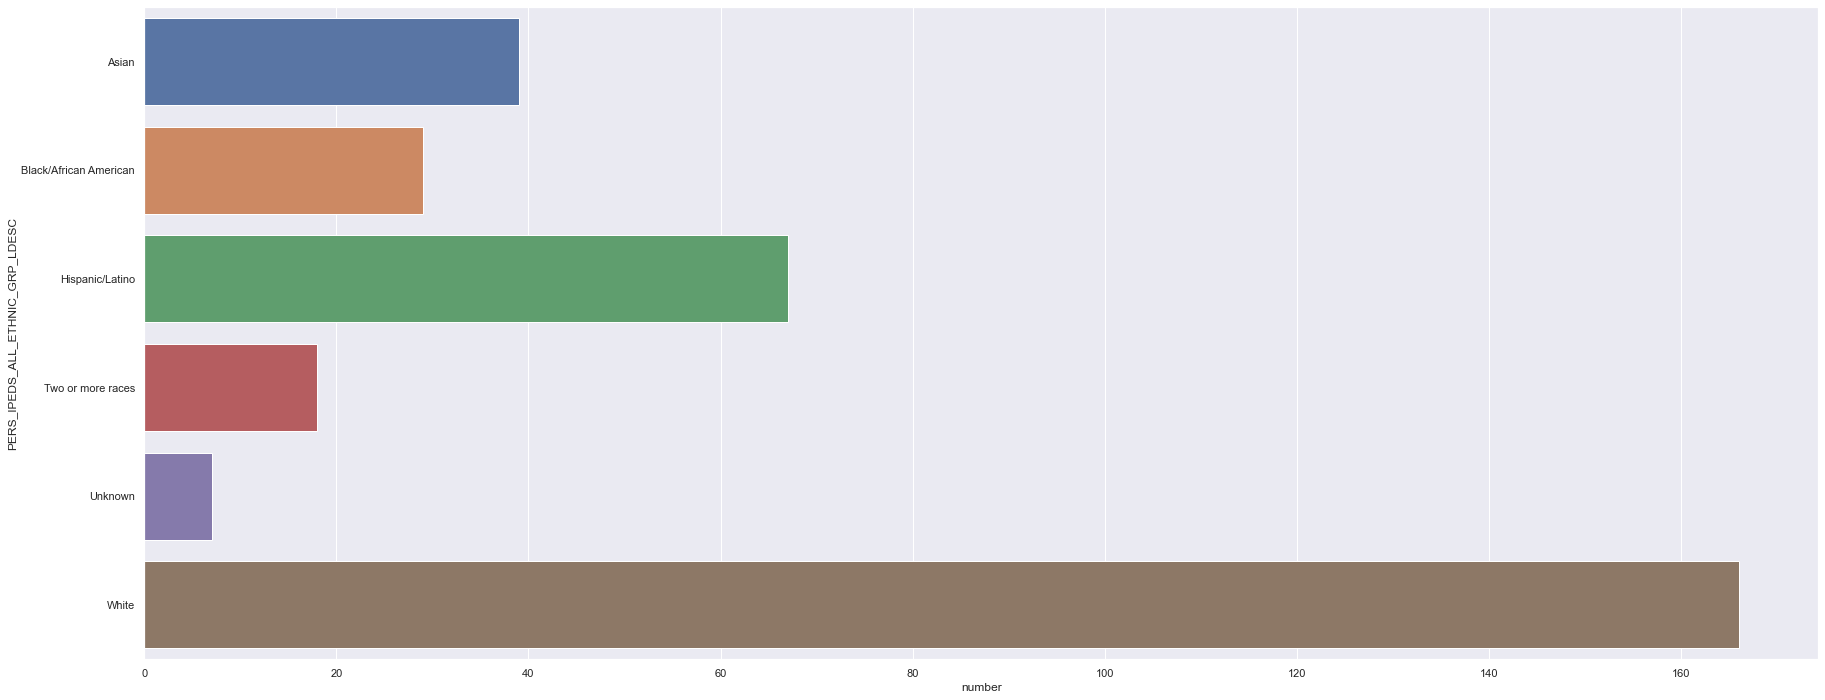

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(30,12)})
#df5 = df4['PERS_IPEDS_ALL_ETHNIC_GRP_LDESC'].value_counts()

#sns.barplot(data = df5,x = 'PERS_IPEDS_ALL_ETHNIC_GRP_LDESC',y = 'PERS_IPEDS_ALL_ETHNIC_GRP_LDESC')

df4[['PERS_IPEDS_ALL_ETHNIC_GRP_LDESC','STRUC_REQ_TERM_LDESC']]
df4['number'] = 1
import pandas as pd
import seaborn as sns
groupedvalues=df4.groupby('STRUC_REQ_TERM_LDESC').sum().reset_index()

groupedvalues2=df4.groupby('PERS_IPEDS_ALL_ETHNIC_GRP_LDESC').sum().reset_index()
g=sns.barplot(x='number',y='PERS_IPEDS_ALL_ETHNIC_GRP_LDESC',data=groupedvalues2)
groupedvalues